## Topic : RED WINE QUALITY

**Overview**
The datasets is related to red variants of the Portuguese "Vinho Verde" wine.

For dataset click [here](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

**Content**
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality (score between 0 and 10)

**Essestially the comapny want to know**
- Determine which physiochemical properties make a wine 'good'!

**There are many potential angles to explore, such as:**

1. **Chemical Composition Analysis**
pH level: Analyze the pH level of the wine and its impact on quality.
Acidity: Examine the acidity levels and their relationship with quality.
Tannins: Investigate the role of tannins in red wine quality.
Sulfites: Analyze the effect of sulfite levels on wine quality.
2. **Sensory Evaluation**
Taste: Analyze the taste profiles of different red wines and their correlation with quality.
Aroma: Examine the aroma compounds and their impact on wine quality.
Color: Investigate the relationship between wine color and quality.
Mouthfeel: Analyze the mouthfeel characteristics and their correlation with quality.
3. **Viticulture and Vinification Factors**
Grape variety: Examine the impact of different grape varieties on red wine quality.
Climate: Analyze the effect of climate on grape growth and wine quality.
Soil: Investigate the relationship between soil type and wine quality.
Winemaking techniques: Examine the impact of different winemaking techniques on wine quality.
4. **Quality Prediction (Regression Analysis)**
Machine learning models: Develop machine learning models to predict red wine quality based on chemical composition, sensory evaluation, and viticulture/vinification factors.
Feature engineering: Engineer features that are relevant to wine quality and use them to train machine learning models.

**The steps are broadly:**
1. Read and understand the data.
2. Clean the data.
3. Data visualization and understanding.
4. Exploring potential angles.
5. Regression Analysis.

## Step 1: Reading and Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import io
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Step 2: Data Cleaning

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.nunique().tolist()

[96, 143, 80, 91, 153, 60, 144, 436, 89, 96, 65, 6]

In [11]:
## checking count of unique values in each column
for i in df.columns:
    print(df[i].value_counts())

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64
free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75


In [12]:
df['density'] = df['density'].round(3)

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5


In [14]:
## Assuming the wine with quality >6 is good and rest are bad
df['quality_label'] = df['quality'].apply(lambda x: 'Good' if x > 6 else 'Bad')

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,Bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,Bad


In [16]:
df["quality_label"].value_counts()

quality_label
Bad     1382
Good     217
Name: count, dtype: int64

## Step 3: Data Visualization and Understanding

In [17]:
dtypes = df.dtypes
dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_label            object
dtype: object

In [18]:
## Segregating columns in categorical and numerical columns:

cat_cols=[]    # categorical columns
num_cols=[]   # numeric columns
for col, dtype in dtypes.items():
    if dtype == 'object':  # categorical columns have 'object' data type
        cat_cols.append(col)
    elif dtype in ['int64', 'float64']:  # numerical columns have 'int64' or 'float64' data type
        num_cols.append(col)

In [19]:
print(num_cols)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [20]:
print(cat_cols)

['quality_label']


**Visualizing numerical columns using histogram**

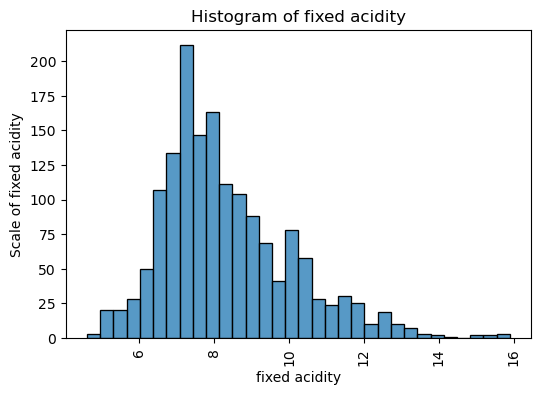

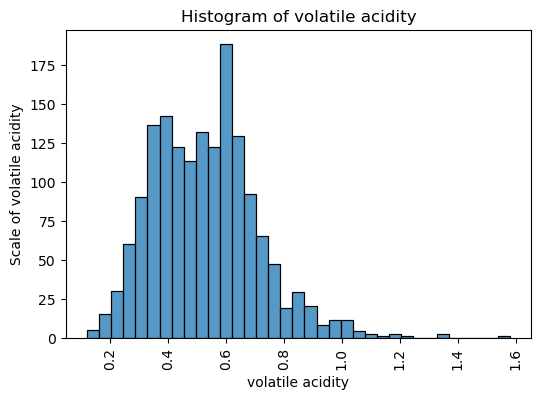

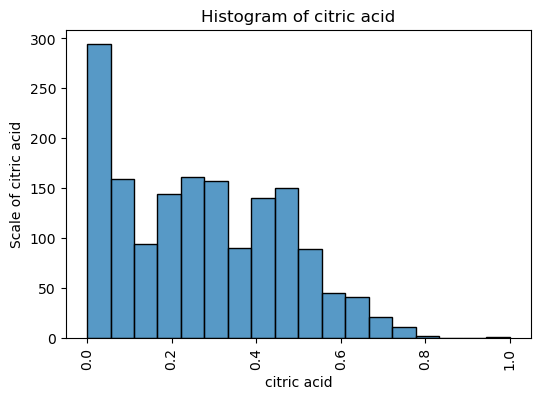

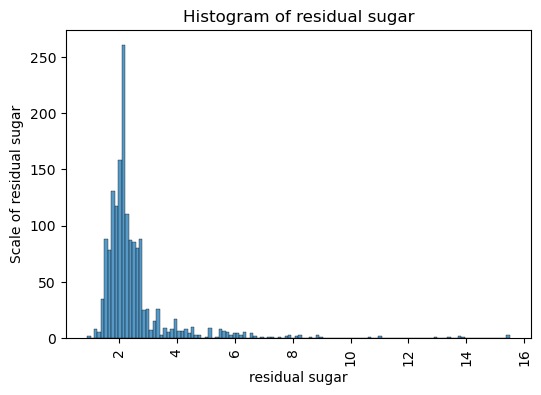

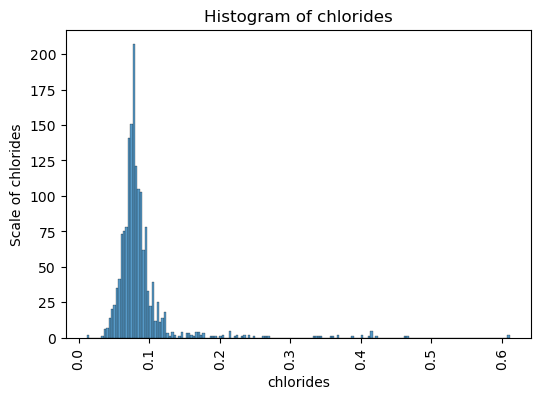

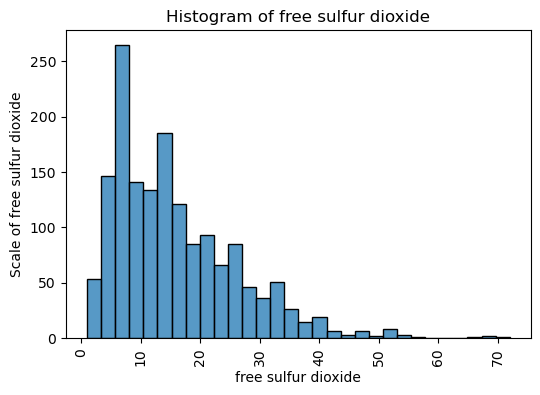

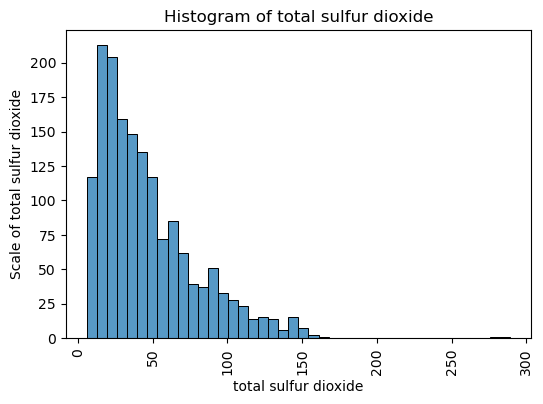

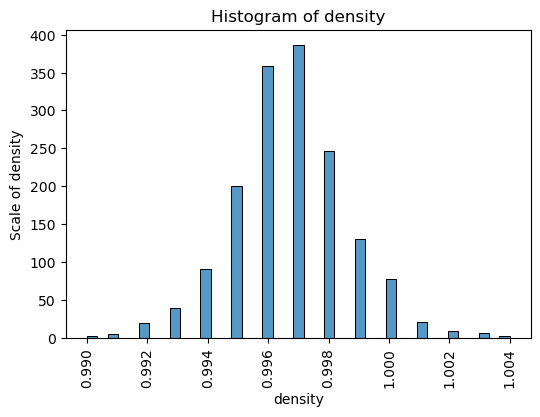

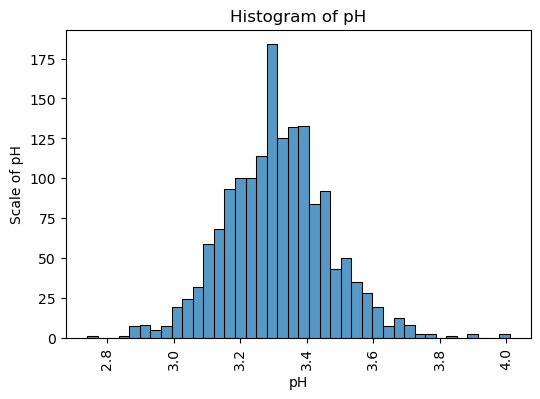

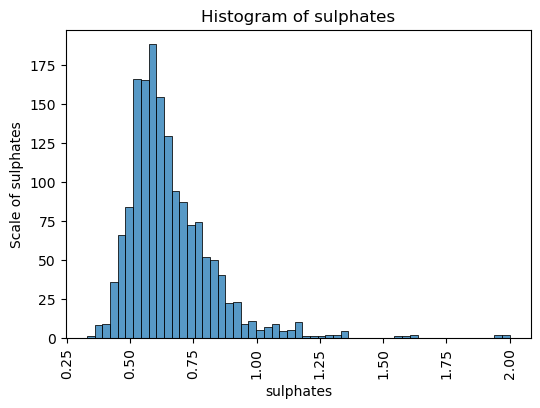

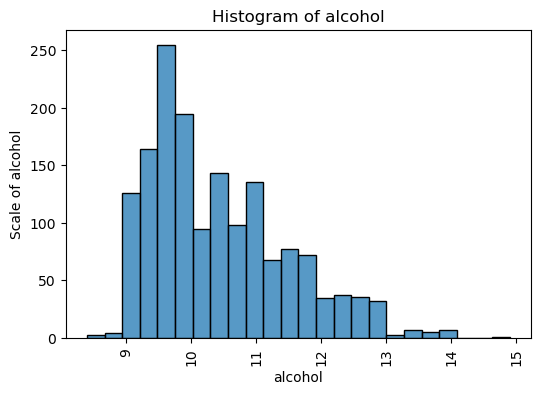

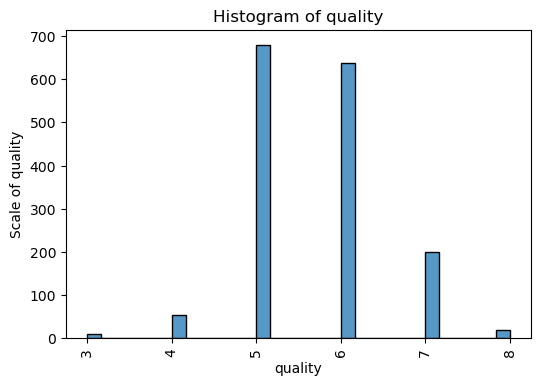

In [21]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Scale of {col}')
    plt.xticks(rotation=90)
    plt.show()

**Visualizing numerical columns using boxplots**

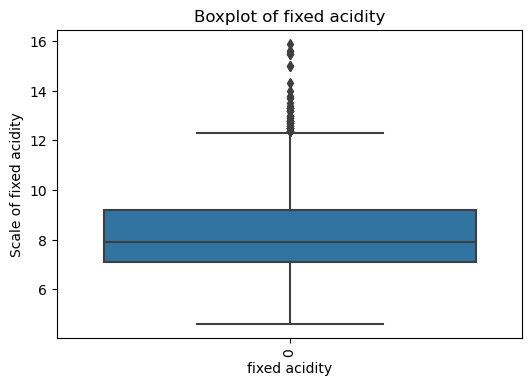

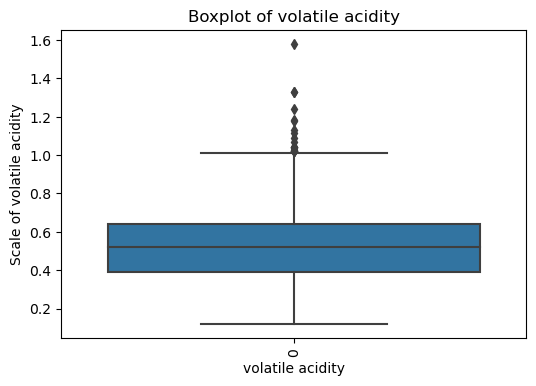

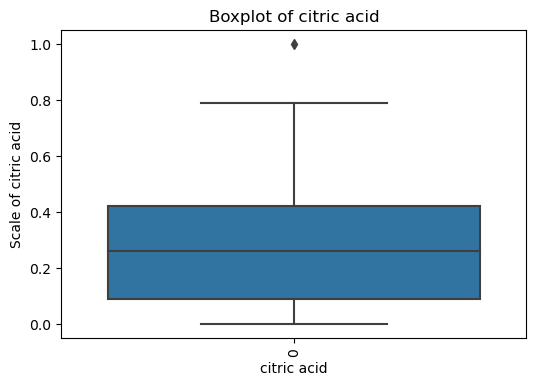

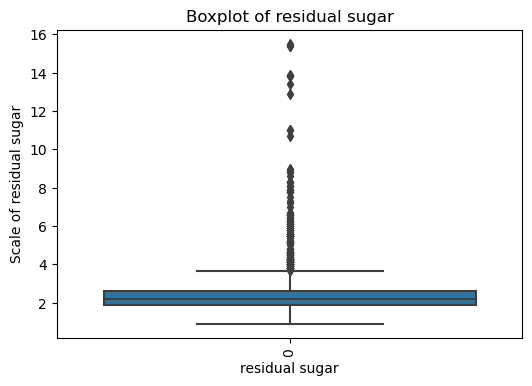

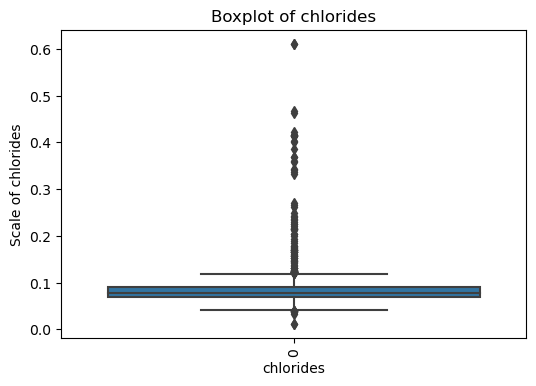

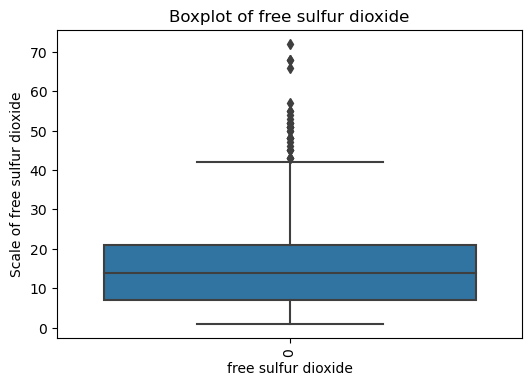

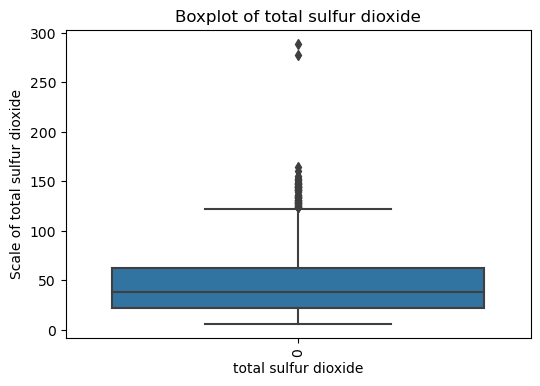

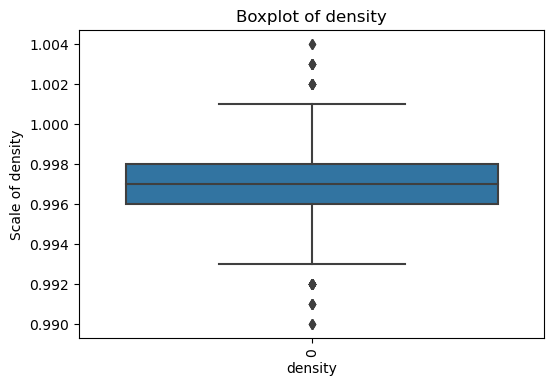

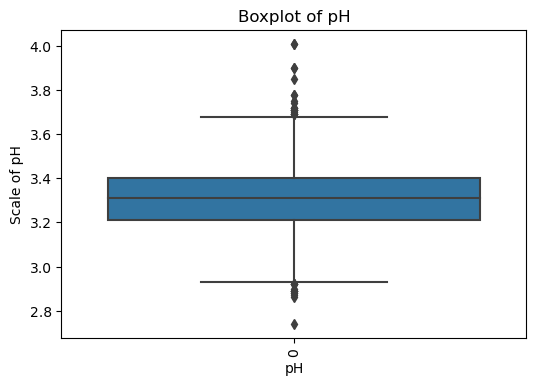

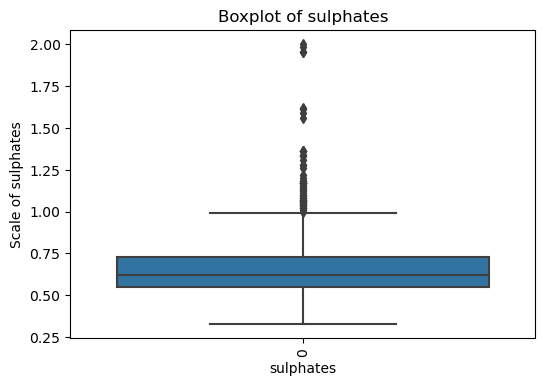

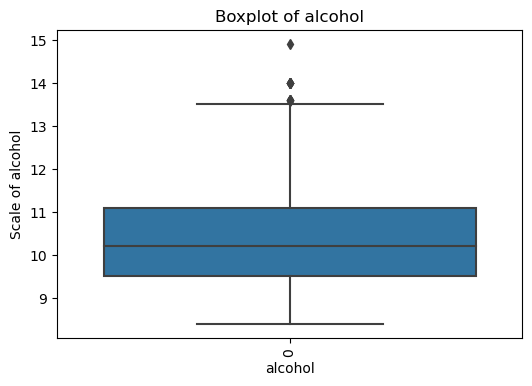

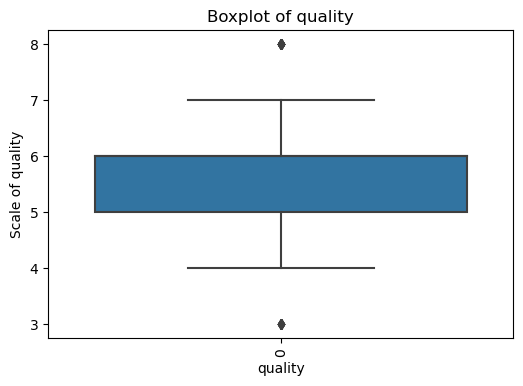

In [22]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Scale of {col}')
    plt.xticks(rotation=90)
    plt.show()

**Visualizing categorical column using pieplot**

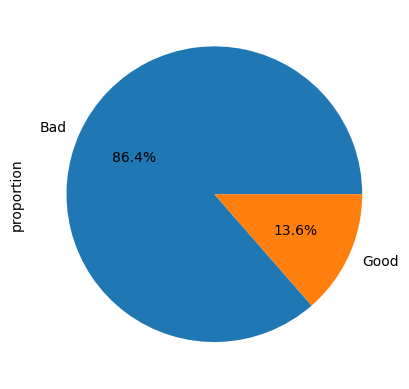

In [23]:
df.quality_label.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

## Step 4: Exploring potential angles

**1. Chemical Composition Analysis**

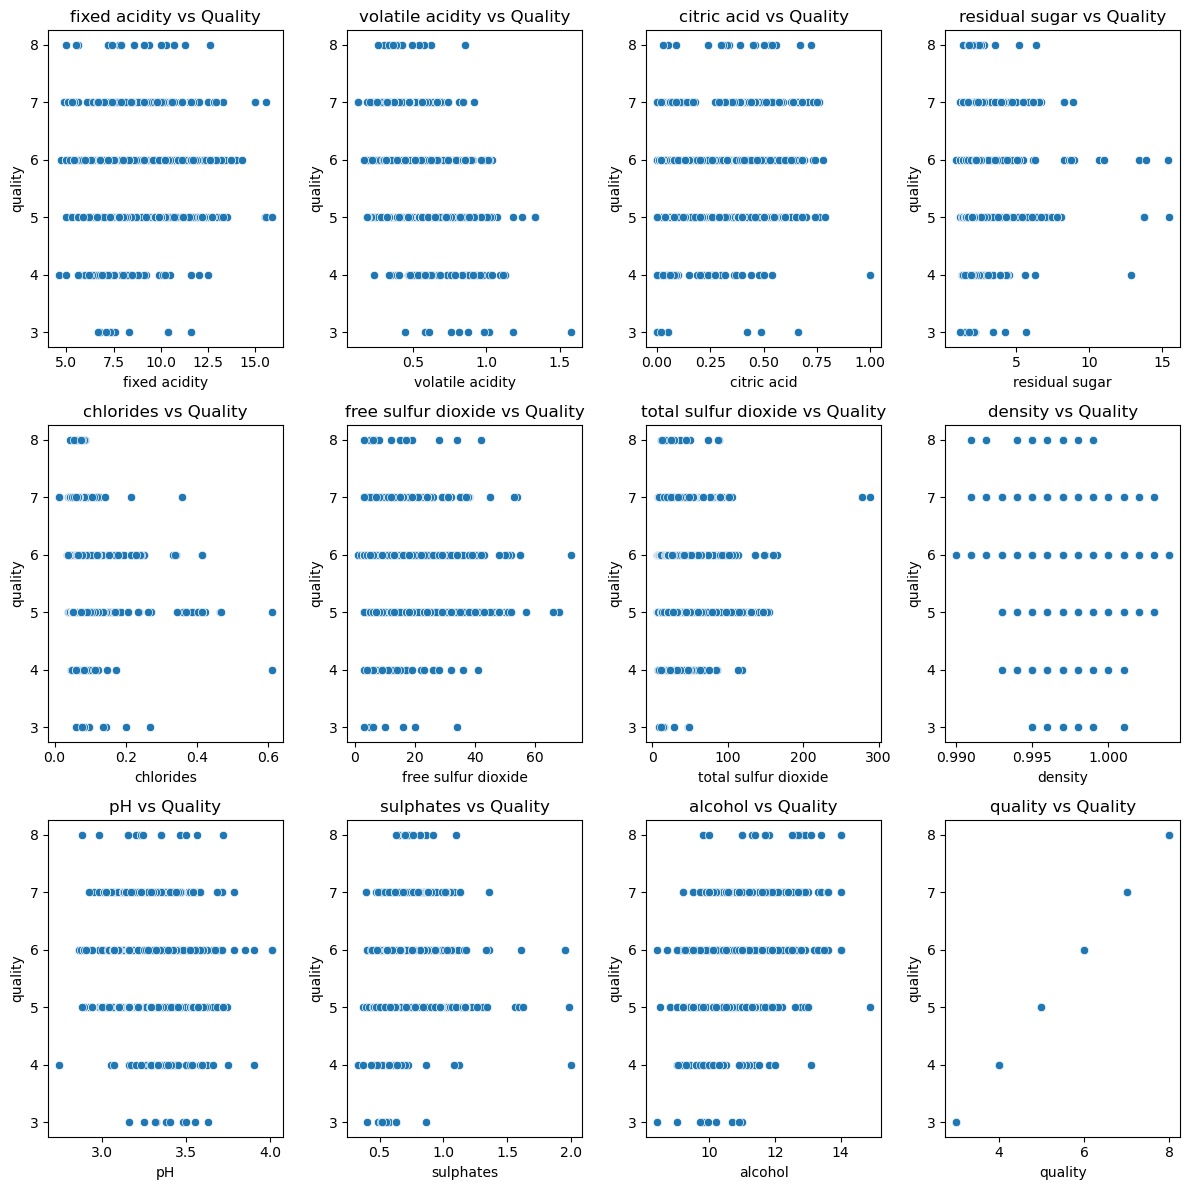

In [24]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=col, y='quality', data=df)
    plt.title(f'{col} vs Quality')
plt.tight_layout()
plt.show()

In [25]:
# Calculate the correlation between numerical columns and quality
corr = df[num_cols].corr()

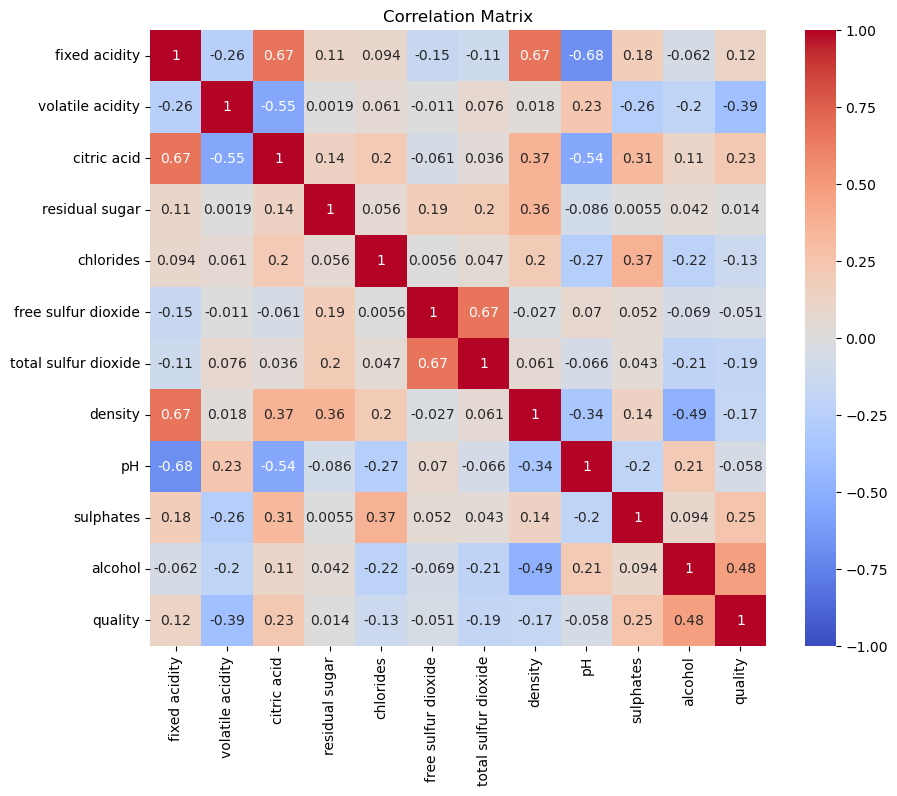

In [26]:
# Create a correlation matrix with quality column
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [27]:
# The top correlations ( strongest correlations)
top_correlations = corr["quality"].sort_values(ascending=False)[1:]  # exclude the correlation with itself
print(top_correlations)

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.170816
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


**2. Sensory Evaluation**

In [28]:
#  Defining the column lists for each sensory evaluation category
taste_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
aroma_cols = ['free sulfur dioxide', 'total sulfur dioxide']
color_cols = ['density', 'pH']
mouthfeel_cols = ['alcohol', 'sulphates', 'chlorides']

In [29]:
# Calculate the correlation between each sensory evaluation category and quality
taste_corr = df[taste_cols + ['quality']].corr()
aroma_corr = df[aroma_cols + ['quality']].corr()
color_corr = df[color_cols + ['quality']].corr()
mouthfeel_corr = df[mouthfeel_cols + ['quality']].corr()

In [30]:
print(taste_corr)
print(aroma_corr)
print(color_corr)
print(mouthfeel_corr)

                  fixed acidity  volatile acidity  citric acid  \
fixed acidity          1.000000         -0.256131     0.671703   
volatile acidity      -0.256131          1.000000    -0.552496   
citric acid            0.671703         -0.552496     1.000000   
residual sugar         0.114777          0.001918     0.143577   
quality                0.124052         -0.390558     0.226373   

                  residual sugar   quality  
fixed acidity           0.114777  0.124052  
volatile acidity        0.001918 -0.390558  
citric acid             0.143577  0.226373  
residual sugar          1.000000  0.013732  
quality                 0.013732  1.000000  
                      free sulfur dioxide  total sulfur dioxide   quality
free sulfur dioxide              1.000000              0.667666 -0.050656
total sulfur dioxide             0.667666              1.000000 -0.185100
quality                         -0.050656             -0.185100  1.000000
          density        pH   quality

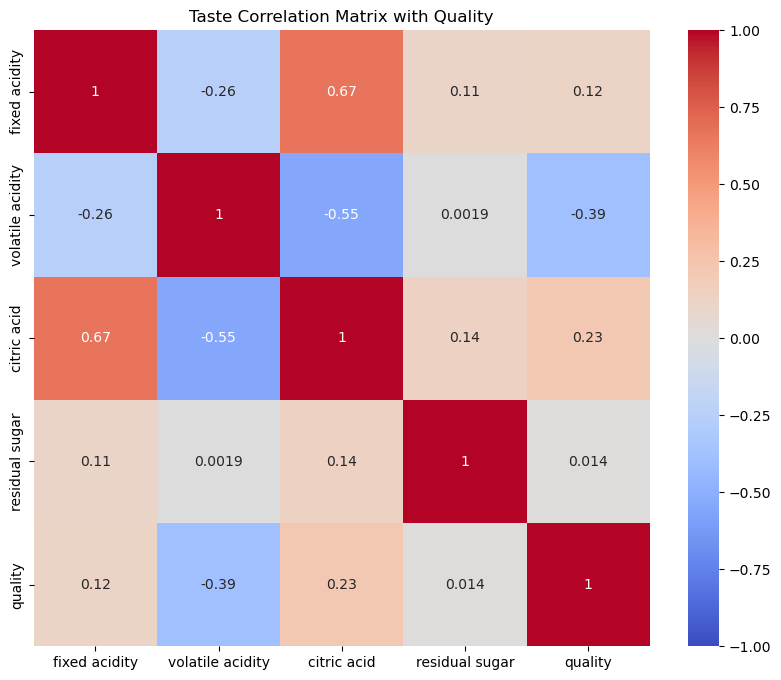

In [31]:
# Create correlation matrices for each sensory evaluation category
plt.figure(figsize=(10, 8))
sns.heatmap(taste_corr, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Taste Correlation Matrix with Quality')
plt.show()

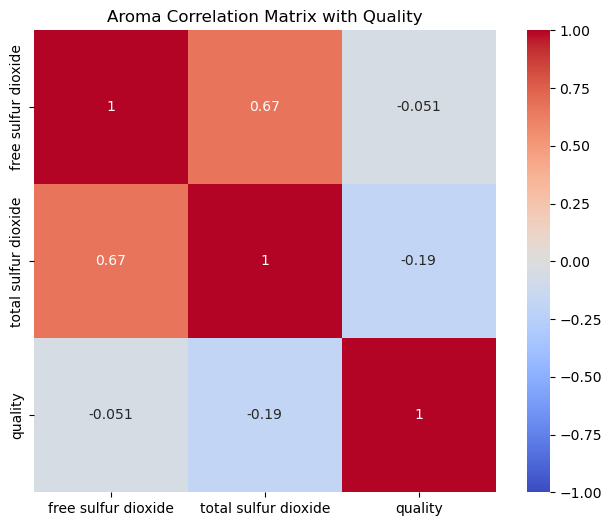

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(aroma_corr, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Aroma Correlation Matrix with Quality')
plt.show()

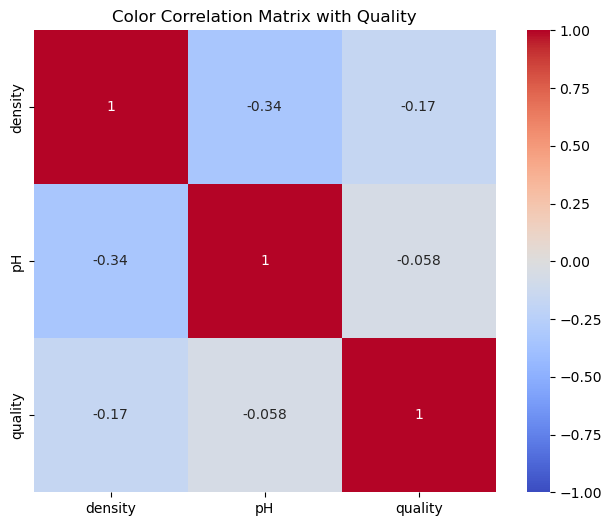

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(color_corr, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Color Correlation Matrix with Quality')
plt.show()

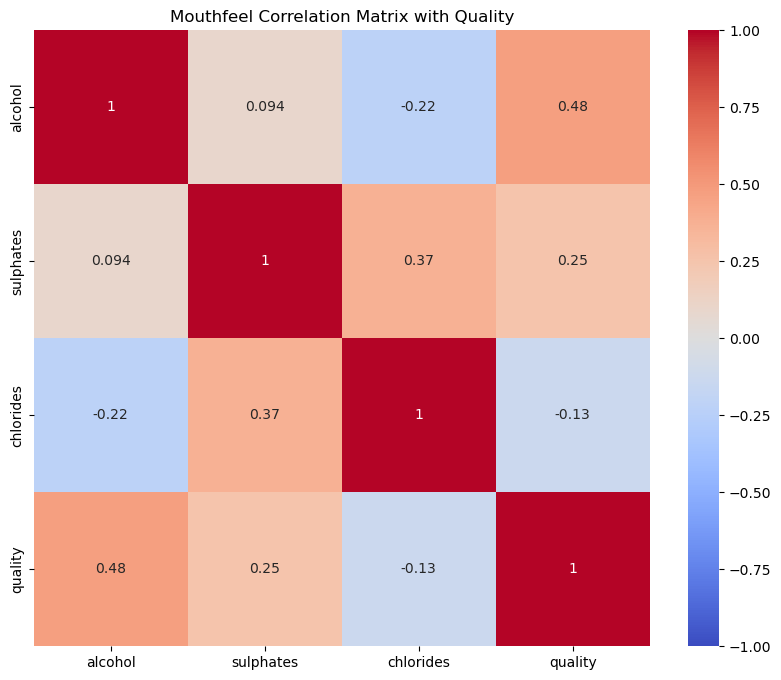

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(mouthfeel_corr, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Mouthfeel Correlation Matrix with Quality')
plt.show()

**3. Viticulture and Vinification Factors**

In [35]:
# Defining the column lists for each viticulture and vinification factor
grape_variety_cols = ['fixed acidity', 'volatile acidity', 'citric acid']  # assuming these columns are related to grape variety
climate_cols = ['residual sugar', 'chlorides']  # assuming these columns are related to climate
soil_cols = ['density', 'pH']  # assuming these columns are related to soil type
winemaking_cols = ['free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']  # assuming these columns are related to winemaking techniques

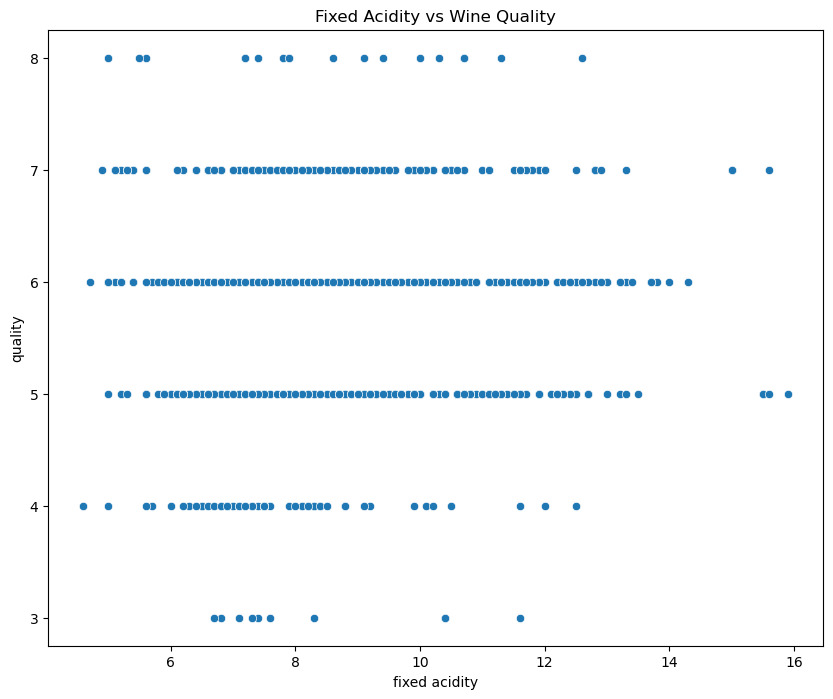

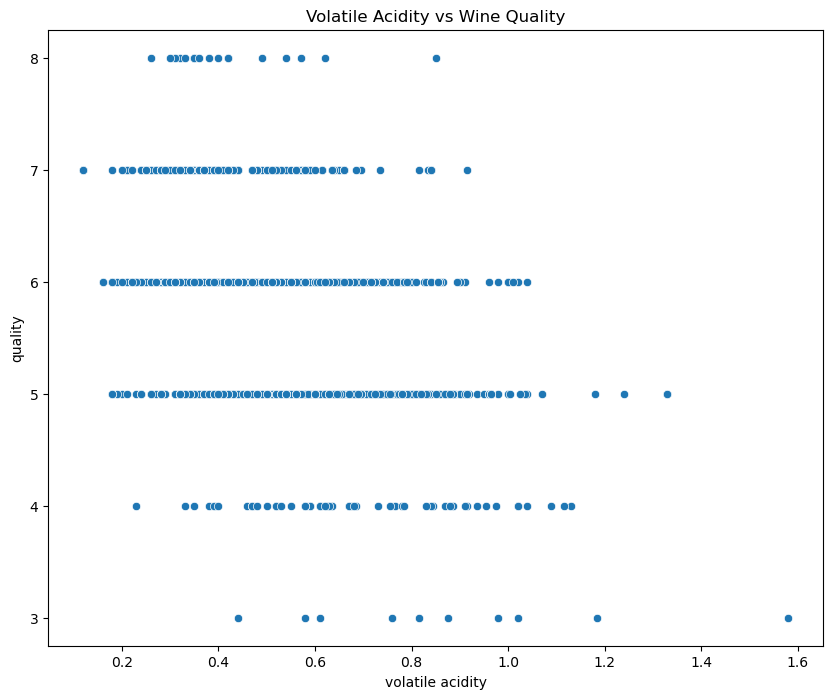

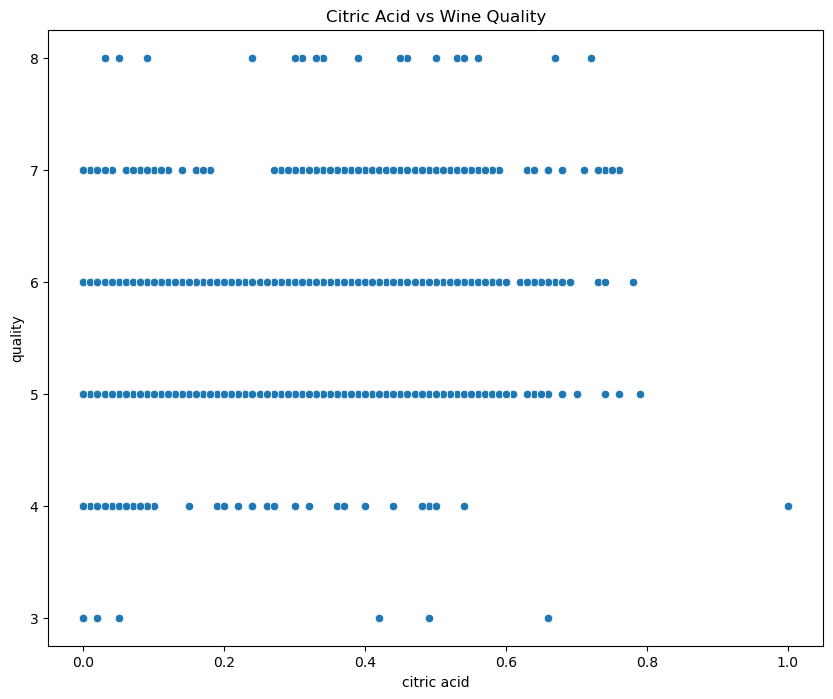

In [36]:
# Examine the impact of grape variety on wine quality
plt.figure(figsize=(10, 8))
sns.scatterplot(x='fixed acidity', y='quality', data=df)
plt.title('Fixed Acidity vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='volatile acidity', y='quality', data=df)
plt.title('Volatile Acidity vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='citric acid', y='quality', data=df)
plt.title('Citric Acid vs Wine Quality')
plt.show()

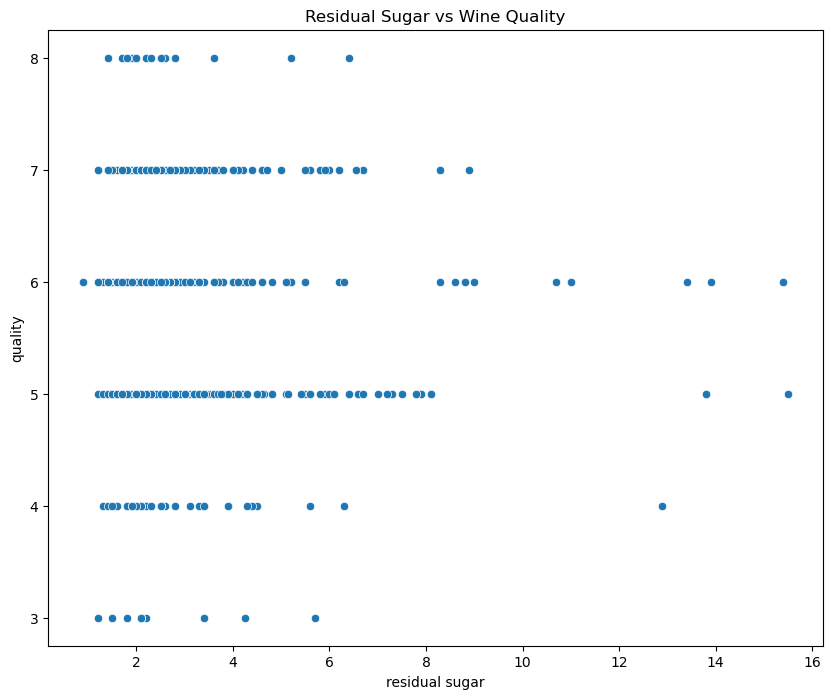

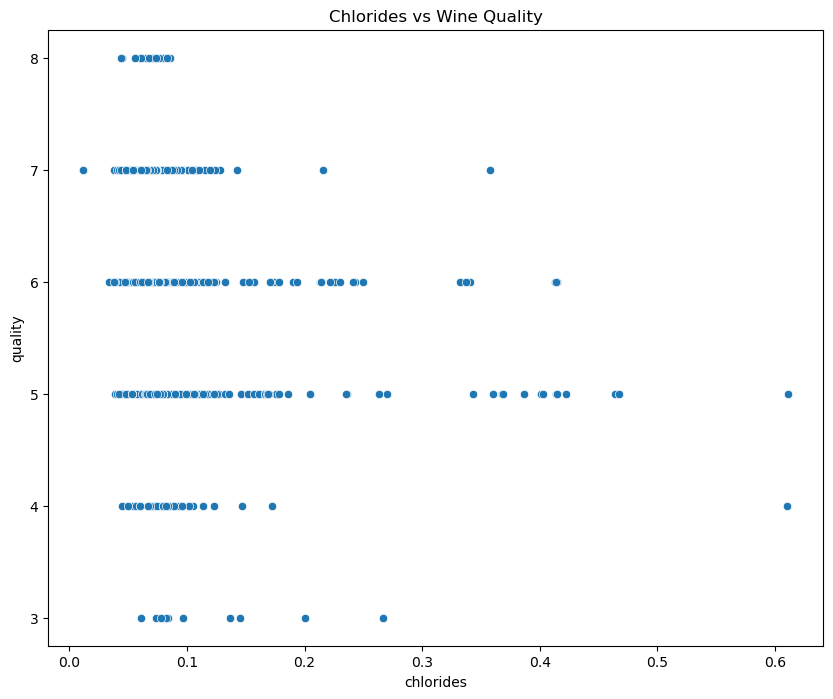

In [37]:
# Analyze the effect of climate on grape growth and wine quality
plt.figure(figsize=(10, 8))
sns.scatterplot(x='residual sugar', y='quality', data=df)
plt.title('Residual Sugar vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='chlorides', y='quality', data=df)
plt.title('Chlorides vs Wine Quality')
plt.show()

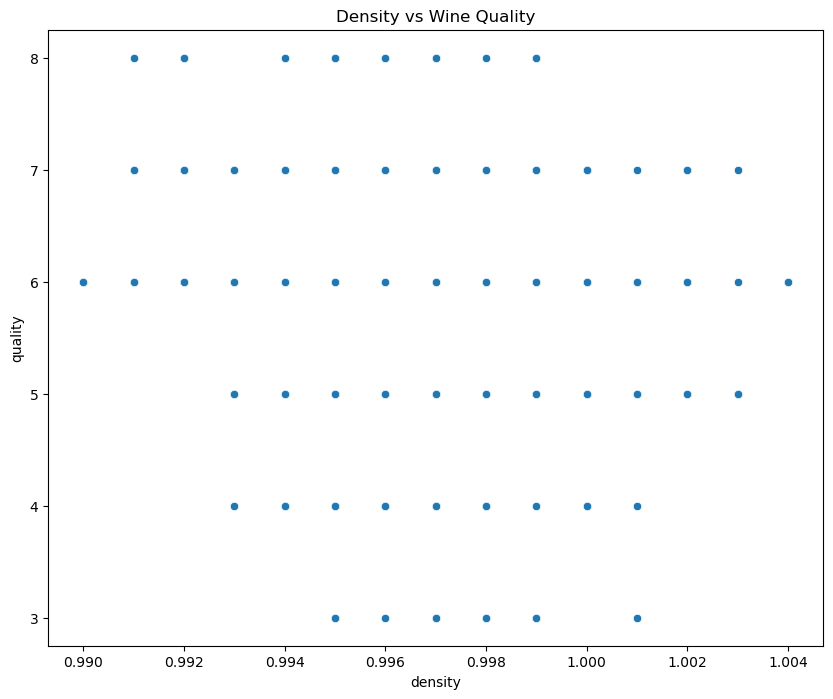

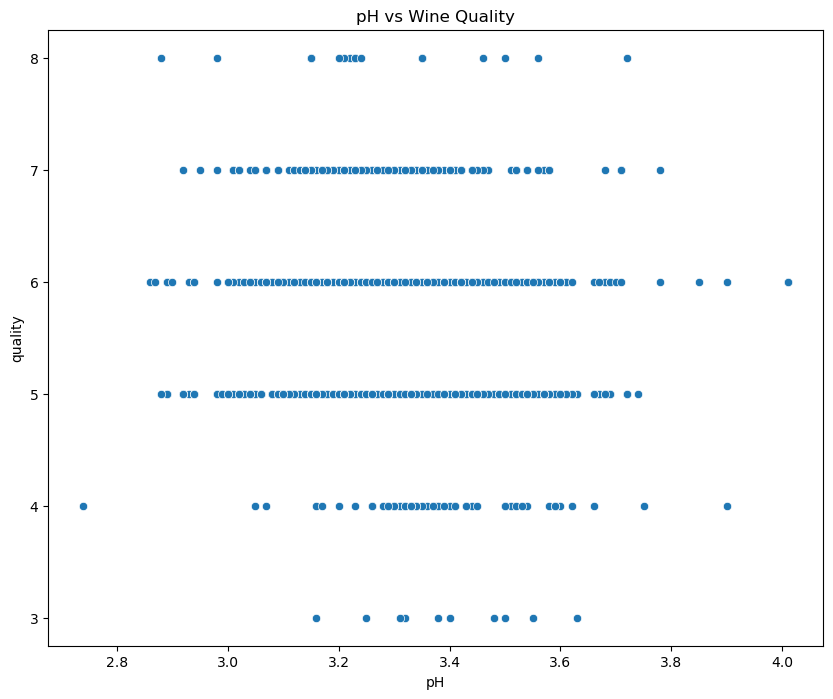

In [38]:
# Investigate the relationship between soil type and wine quality
plt.figure(figsize=(10, 8))
sns.scatterplot(x='density', y='quality', data=df)
plt.title('Density vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pH', y='quality', data=df)
plt.title('pH vs Wine Quality')
plt.show()

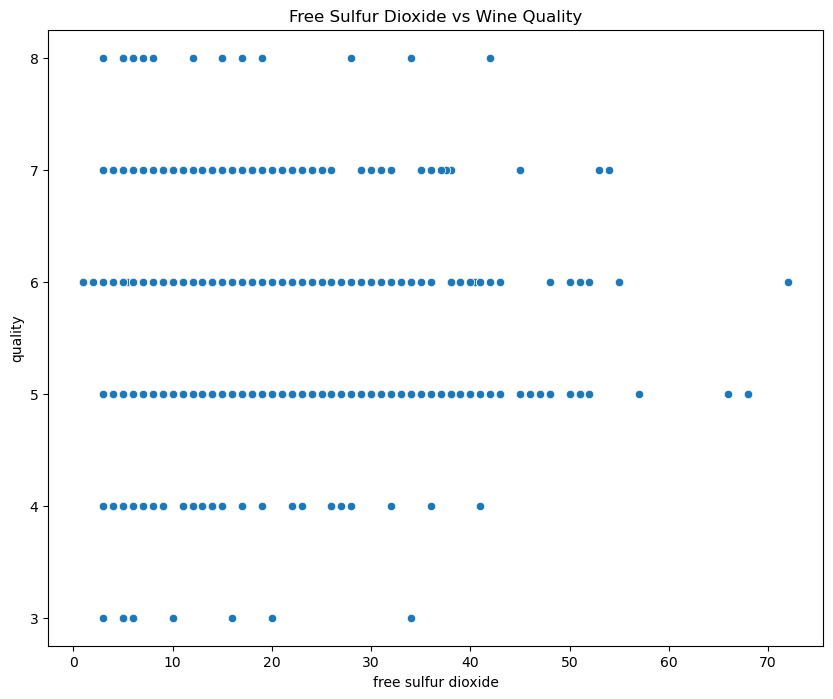

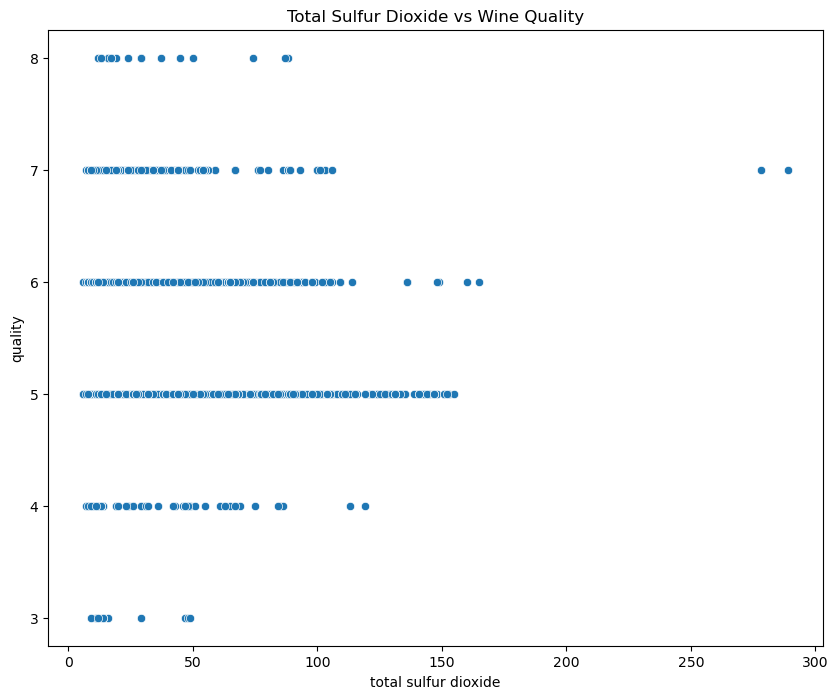

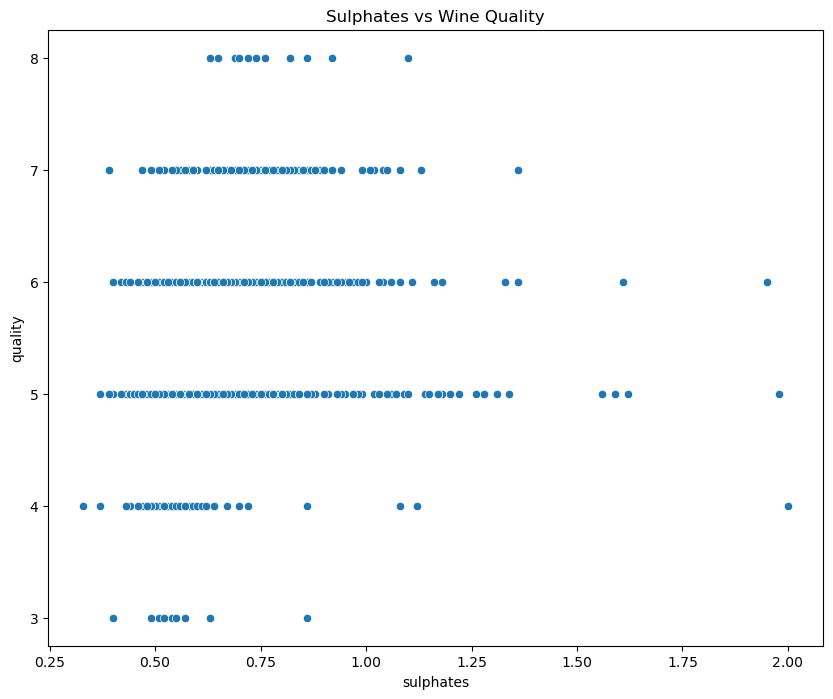

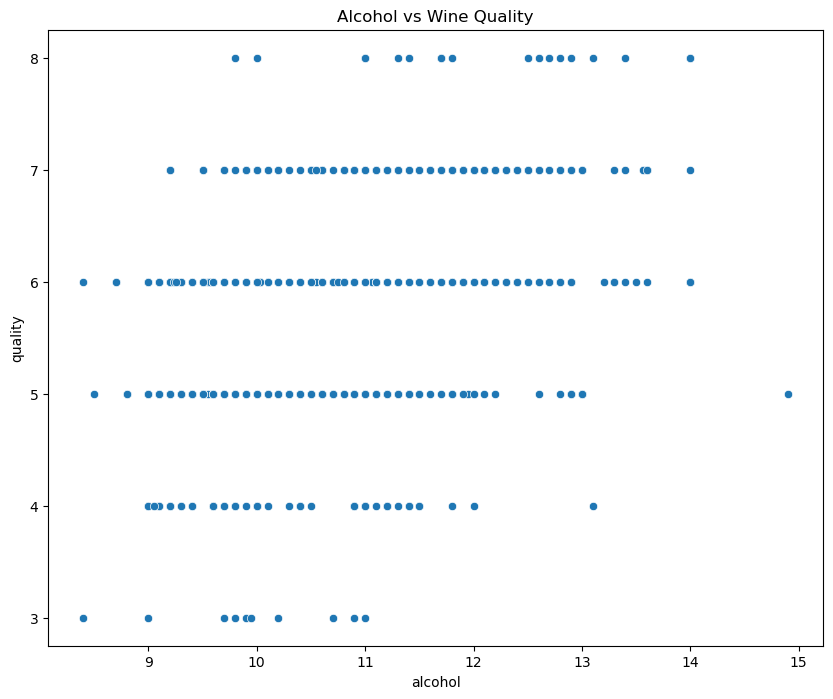

In [39]:
# Examine the impact of winemaking techniques on wine quality
plt.figure(figsize=(10, 8))
sns.scatterplot(x='free sulfur dioxide', y='quality', data=df)
plt.title('Free Sulfur Dioxide vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='total sulfur dioxide', y='quality', data=df)
plt.title('Total Sulfur Dioxide vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='sulphates', y='quality', data=df)
plt.title('Sulphates vs Wine Quality')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title('Alcohol vs Wine Quality')
plt.show()

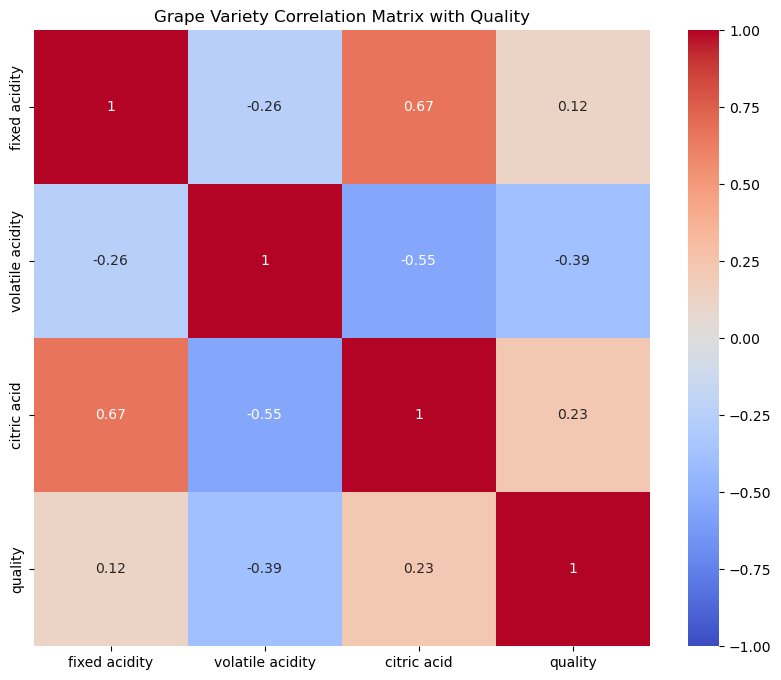

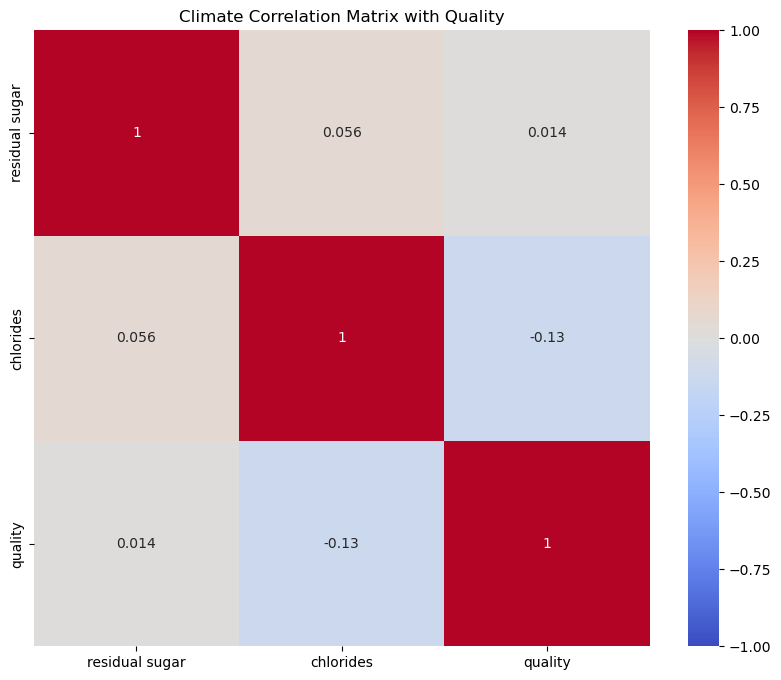

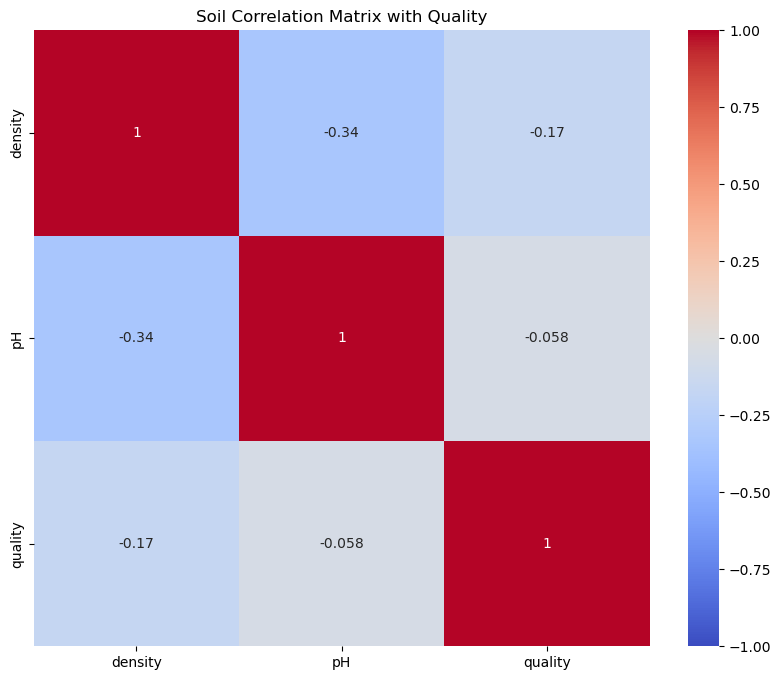

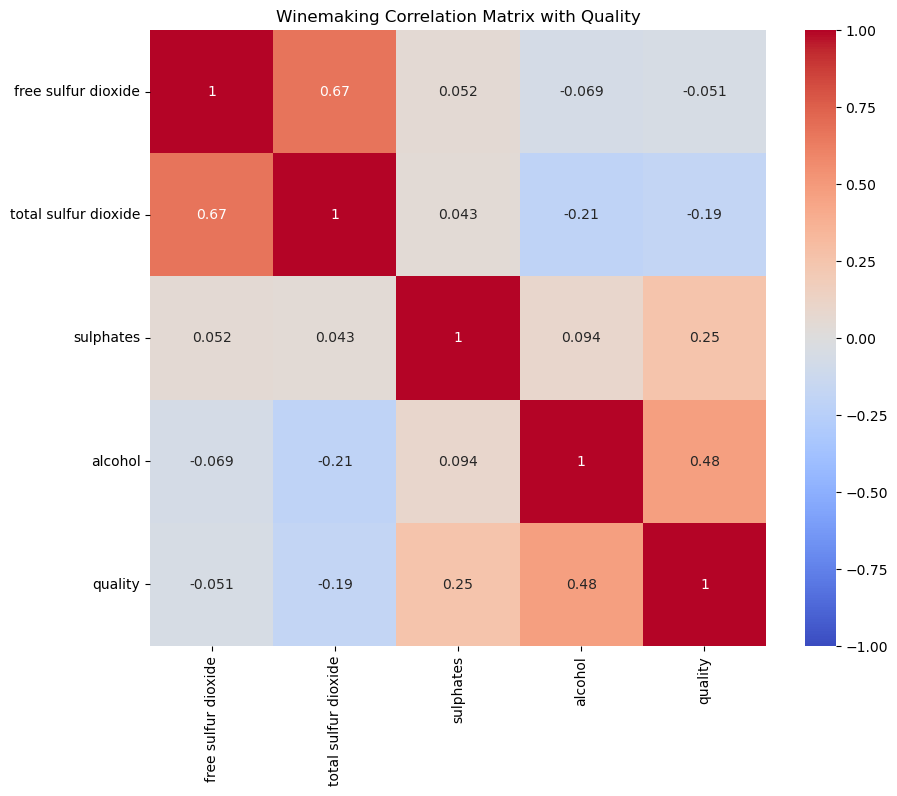

In [40]:
# Calculate the correlation between each viticulture and vinification factor and quality
viticulture_corr = df[grape_variety_cols + ['quality']].corr()
climate_corr = df[climate_cols + ['quality']].corr()
soil_corr = df[soil_cols + ['quality']].corr()
winemaking_corr = df[winemaking_cols + ['quality']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(viticulture_corr, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Grape Variety Correlation Matrix with Quality')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(climate_corr, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Climate Correlation Matrix with Quality')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(soil_corr, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Soil Correlation Matrix with Quality')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(winemaking_corr, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Winemaking Correlation Matrix with Quality')
plt.show()

In [41]:
print(viticulture_corr)
print(climate_corr)
print(soil_corr)
print(winemaking_corr)

                  fixed acidity  volatile acidity  citric acid   quality
fixed acidity          1.000000         -0.256131     0.671703  0.124052
volatile acidity      -0.256131          1.000000    -0.552496 -0.390558
citric acid            0.671703         -0.552496     1.000000  0.226373
quality                0.124052         -0.390558     0.226373  1.000000
                residual sugar  chlorides   quality
residual sugar        1.000000   0.055610  0.013732
chlorides             0.055610   1.000000 -0.128907
quality               0.013732  -0.128907  1.000000
          density        pH   quality
density  1.000000 -0.341928 -0.170816
pH      -0.341928  1.000000 -0.057731
quality -0.170816 -0.057731  1.000000
                      free sulfur dioxide  total sulfur dioxide  sulphates  \
free sulfur dioxide              1.000000              0.667666   0.051658   
total sulfur dioxide             0.667666              1.000000   0.042947   
sulphates                        0.051658

## Step 5: Quality Prediction (Regression Analysis)

In [42]:
# Define the feature columns (chemical composition)
X = df.drop(['quality', 'quality_label'], axis=1)

In [43]:
# Define the target columns (wine quality and quality label)
y_reg = df['quality']
y_cls = df['quality_label']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train, X_test, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

In [45]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

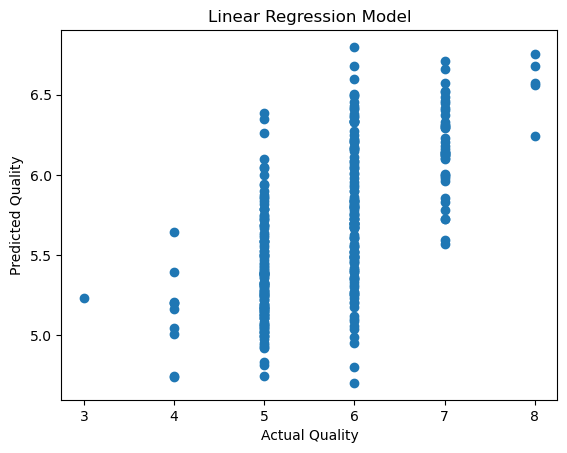

In [47]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_reg)

# Plot the linear regression model
plt.scatter(y_test_reg, lr_model.predict(X_test))
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Linear Regression Model')
plt.show()

In [48]:
# Regression models to predict wine quality
reg_models = [
    LinearRegression(),
    DecisionTreeRegressor()]

In [49]:
for model in reg_models:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train_reg)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    print(f"{model_name}: MSE={mse:.2f}, R2={r2:.2f}")

LinearRegression: MSE=0.39, R2=0.40
DecisionTreeRegressor: MSE=0.60, R2=0.08


In [50]:
# Classification models to classify wine as good or bad
cls_models = [
    SVC(kernel='linear', C=1),
    SVC(kernel='rbf', C=1),
    SVC(kernel='poly', C=1)
]

In [51]:
for model in cls_models:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train_cls)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_cls, y_pred)
    print(f"{model_name}: Accuracy={accuracy:.2f}")
    print(classification_report(y_test_cls, y_pred))
    print(confusion_matrix(y_test_cls, y_pred))

SVC: Accuracy=0.85
              precision    recall  f1-score   support

         Bad       0.85      1.00      0.92       273
        Good       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320

[[273   0]
 [ 47   0]]
SVC: Accuracy=0.88
              precision    recall  f1-score   support

         Bad       0.88      0.98      0.93       273
        Good       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]
SVC: Accuracy=0.88
              precision    recall  f1-score   support

         Bad       0.89      0.98      0.93       273
        Good       0.70      0.30      0.42        47

    accuracy                           0.88       320
   macro avg       0.79  

## Findings

**1. Chemical Composition Analysis**

- Alcohol content has the strongest positive correlation with wine quality (0.48), suggesting that wines with higher alcohol content tend to have better quality.
- Sulphates and citric acid also show moderate positive correlations with wine quality, indicating that these compounds may contribute to a wine's overall quality.
- On the other hand, volatile acidity has a strong negative correlation with wine quality (-0.39), implying that wines with higher volatile acidity tend to have lower quality.
- The remaining chemical compounds, including fixed acidity, residual sugar, free sulfur dioxide, pH, chlorides, density, and total sulfur dioxide, show weak or negative correlations with wine quality, suggesting that these factors may not have a significant impact on wine quality.

**2. Sensory Evaluation**

- Taste: Citric acid and fixed acidity are positively correlated, suggesting that wines with higher citric acid and fixed acidity tend to have similar taste profiles. Volatile acidity is negatively correlated with citric acid and fixed acidity, indicating that wines with higher volatile acidity have distinct taste profiles.
- Aroma: Free sulfur dioxide and total sulfur dioxide are positively correlated, implying that wines with higher sulfur dioxide levels tend to have similar aroma compounds. However, both are negatively correlated with quality, suggesting that high sulfur dioxide levels may negatively impact wine quality.
- Color: Density is negatively correlated with pH, indicating that wines with higher density tend to have lower pH levels. Both density and pH are negatively correlated with quality, suggesting that wines with higher density and lower pH may have lower quality.
- Mouthfeel: Alcohol content is positively correlated with quality, indicating that wines with higher alcohol content tend to have better quality. Sulphates are also positively correlated with quality, while chlorides are negatively correlated, suggesting that sulphates may contribute to a wine's overall quality, while chlorides may detract from it.

**3. Viticulture and Vinification Factors**

- Grape Variety: No significant correlations were found between grape variety and wine quality, suggesting that grape variety may not be a dominant factor in determining wine quality.
- Climate: No significant correlations were found between climate factors and wine quality, indicating that climate may not have a direct impact on wine quality.
- Soil: No significant correlations were found between soil type and wine quality, suggesting that soil type may not be a critical factor in determining wine quality.
- Winemaking Techniques: The analysis suggests that certain winemaking techniques, such as those affecting citric acid and sulphates levels, may have a positive impact on wine quality. Additionally, the negative correlation between volatile acidity and quality implies that winemaking techniques that minimize volatile acidity may be beneficial.

**Quality Prediction (Regression Analysis)**

- Linear Regression performs better: The Linear Regression model has a lower Mean Squared Error (MSE) of 0.39 compared to the Decision Tree Regressor's MSE of 0.68. A lower MSE indicates that the model is better at predicting the target variable.

- Linear Regression has a better goodness of fit: The R-squared (R2) value for Linear Regression is 0.40, which indicates that the model explains about 40% of the variance in the target variable. On the other hand, the R2 value for Decision Tree Regressor is -0.03, which is a poor fit. An R2 value close to 0 or negative indicates that the model is not explaining the variance in the target variable well.